In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Advertising

In [12]:
data = np.genfromtxt('advertising.csv', delimiter=',', skip_header=1)
N = data.shape[0]
X = data[:,:3]
Y = data[:,-1]

In [13]:
def mean_normalization(x):
    # Normalize input data by using mean normalizaton
    N = len(x)
    max = np.max(x)
    min = np.min(x)
    avg = np.mean(x)

    x = (x-avg) / (max-min)
    x_b = np.c_[np.ones((N,1)), x]

    return x_b, max, min, avg

X_b, maxi_x, mini_x, avg_x = mean_normalization(X)
X_b.shape

(200, 4)

In [6]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):

    # weights = np.random.randn(4, 1)
    thetas = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]]) #(4, 1)
    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        epoch_loss = 0.0
        for i in range(N):
            random_index = i

            xi = X_b[random_index:random_index+1] #(1, 4)
            yi = y[random_index:random_index+1] #(1,)

            #compute output
            y_hat = np.dot(xi, thetas) #(1, 1)

            #compute loss li 
            loss_i = (y_hat - yi)**2 #(1, 1)

            #compute gradient for loss
            dl_dy = 2*(y_hat - yi) #(1 , 1)

            #compute gradient
            gradient = dl_dy * xi
            
            #update thetas
            thetas = thetas - learning_rate * gradient.T

            #logging
            thetas_path.append(thetas)
            losses.append(loss_i.item())

    return thetas_path, losses


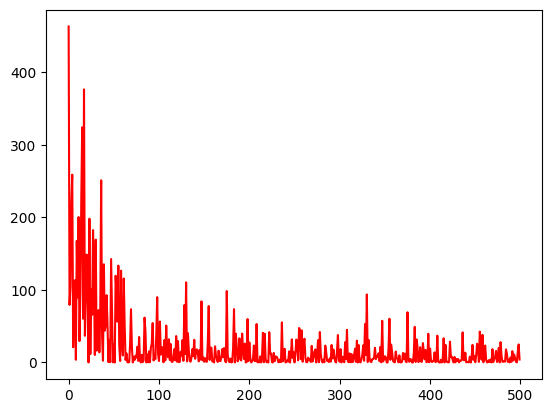

In [7]:
sgd_theta , losses = stochastic_gradient_descent(X_b , Y, n_epochs =50,learning_rate =0.01 )
x_axis = list(range(500))
plt.plot(x_axis , losses[:500] , color="r")
plt.show()

In [8]:
#Question 1:
# a) 7865.65
# b) 6865.65
# c) 5865.65
# d) 8865.65
sgd_theta , losses = stochastic_gradient_descent(X_b , Y, n_epochs=1,learning_rate=0.01)
print(np.sum(losses))

8392.629213090673


In [18]:
def mini_batch_gradient_descent(X_b , y, n_epochs =50, minibatch_size =20, learning_rate =0.01):

    # thetas = np.random.randn(4, 1)
    thetas = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]]) #(4, 1)

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        # shuffled_indices = np.random.permutation(N) # uncomment this code for real application

        shuffled_indices = np.asarray ([21, 144, 17, 107, 37, 115, 167, 31, 3,
        132, 179, 155, 36, 191, 182, 170, 27, 35, 162, 25, 28, 73, 172, 152, 102, 16,
        185, 11, 1, 34, 177, 29, 96, 22, 76, 196, 6, 128, 114, 117, 111, 43, 57, 126,
        165, 78, 151, 104, 110, 53, 181, 113, 173, 75, 23, 161, 85, 94, 18, 148, 190,
        169, 149, 79, 138, 20, 108, 137, 93, 192, 198, 153, 4, 45, 164, 26, 8, 131,
        77, 80, 130, 127, 125, 61, 10, 175, 143, 87, 33, 50, 54, 97, 9, 84, 188, 139,
        195, 72, 64, 194, 44, 109, 112, 60, 86, 90, 140, 171, 59, 199, 105, 41, 147,
        92, 52, 124, 71, 197, 163, 98, 189, 103, 51, 39, 180, 74, 145, 118, 38, 47,
        174, 100, 184, 183, 160, 69, 91, 82, 42, 89, 81, 186, 136, 63, 157, 46, 67,
        129, 120, 116, 32, 19, 187, 70, 141, 146, 15, 58, 119, 12, 95, 0, 40, 83, 24,
        168, 150, 178, 49, 159, 7, 193, 48, 30, 14, 121, 5, 142, 65, 176, 101, 55,
        133, 13, 106, 66, 99, 68, 135, 158, 88, 62, 166, 156, 2, 134, 56, 123, 122,
        154])

        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size] #(20, 4)
            yi = y_shuffled[i:i+minibatch_size] #(20,)
            

            # compute output
            #******* Your code here ********
            y_hat = np.dot(xi, thetas) #(20, 1)

            # compute loss
            #******* Your code here ********
            loss = (y_hat - yi.reshape(y_hat.shape)) ** 2 #(20, 1) - (20,)

            # compute derivative of loss
            #******* Your code here ********
            dl_dyhat = 2*(y_hat - yi.reshape(y_hat.shape)) #(20, 1)

            # compute derivative of parameters
            #******* Your code here ********
            gradients = xi.T.dot(dl_dyhat) #(4,20) and (20,1)

            # update parameters
            thetas = thetas - learning_rate*gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path , losses


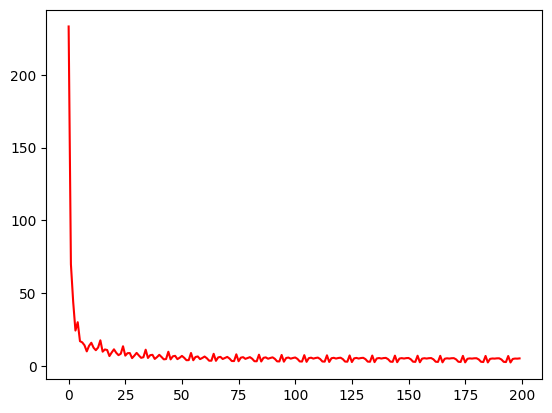

In [19]:
mbgd_thetas , losses = mini_batch_gradient_descent(X_b , Y, n_epochs =50, minibatch_size = 20, learning_rate =0.01)

x_axis = list(range(200))
plt.plot(x_axis ,losses[:200] , color="r")
plt.show()

In [21]:
#Question 2
# a) 7865.65
# b) 6865.65
# c) 5865.65
# d) 8865.65
mbgd_thetas , losses = mini_batch_gradient_descent(X_b , Y, n_epochs =50,minibatch_size = 20, learning_rate =0.01)
print(round(sum(losses) ,2))

2727.28


# BATCH_GRADIENT_DESCENT

In [8]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    # X_b: features (200, 4)
    # y: labels (200,)

    thetas = np.asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]]) #(4, 1)

    thetas_path = [thetas]
    losses = []

    for epoch in range(n_epochs):
        #compute output
        y_hat = np.dot(X_b, thetas) #(200, 1)

        #compute loss
        loss = (y_hat - y.reshape(y_hat.shape)) ** 2 #(200, 1)

        #compute loss's gradient
        dl = 2 * (y_hat - y.reshape(y_hat.shape)) #(200, 1)

        #compute parameters's gradient
        gradients = np.dot(X_b.T, dl)

        #update params
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses


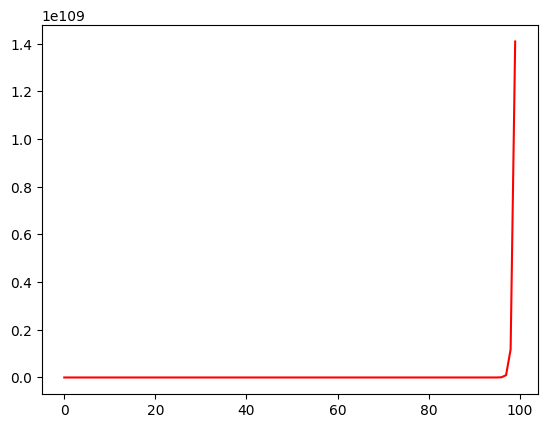

In [9]:
bgd_thetas , losses = batch_gradient_descent(X_b , Y, n_epochs = 100, learning_rate =0.01)

x_axis = list(range(100))
plt.plot(x_axis ,losses[:200] , color="r")
plt.show()

In [15]:
#Question 3
# a) 7716.46
# b) 8716.46
# c) 6716.46
# d) 5716.46
bgd_thetas , losses = batch_gradient_descent(X_b , Y, n_epochs =100, learning_rate=0.01)
print(round(sum(losses) ,2))

1.5373154381901923e+109


# Bitcoin forecasting
